# --- Day 19: A Series of Tubes ---

Somehow, a network packet got lost and ended up here. It's trying to follow a routing diagram (your puzzle input), but it's confused about where to go.

Its starting point is just off the top of the diagram. Lines (drawn with |, -, and +) show the path it needs to take, starting by going down onto the only line connected to the top of the diagram. It needs to follow this path until it reaches the end (located somewhere within the diagram) and stop there.

Sometimes, the lines cross over each other; in these cases, it needs to continue going the same direction, and only turn left or right when there's no other option. In addition, someone has left letters on the line; these also don't change its direction, but it can use them to keep track of where it's been. For example:

```
     |          
     |  +--+    
     A  |  C    
 F---|----E|--+ 
     |  |  |  D 
     +B-+  +--+ 
```

Given this diagram, the packet needs to take the following path:

- Starting at the only line touching the top of the diagram, it must go down, pass through A, and continue onward to the first +.
- Travel right, up, and right, passing through B in the process.
- Continue down (collecting C), right, and up (collecting D).
- Finally, go all the way left through E and stopping at F.

Following the path to the end, the letters it sees on its path are `ABCDEF`.

The little packet looks up at you, hoping you can help it find the way. **What letters will it see (in the order it would see them) if it follows the path?** (The routing diagram is very wide; make sure you view it without line wrapping.)

In [62]:
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns

# the puzzle input
with open('puzzle_inputs/day19_input.txt') as f:
    data = f.read().split("\n")
puzzle_input = [line for line in data]
puzzle_input[:8]

[' |                                                                                                                                                                                                       ',
 ' |                                   +---------------------------------------------------------------------------------------------------------------------------------------------------------------+   ',
 ' |                                   |                                                                                                                                                               |   ',
 ' |     +-------------------------------------------+                                                   +-------------+   +---------------+                     +-------------------------------------+   ',
 ' |     |                             |             |                                                   |             |   |               |                     |              

In [2]:
test_input = """     |          
     |  +--+    
     A  |  C    
 F---|----E|--+ 
     |  |  |  D 
     +B-+  +--+"""
test_input = test_input.split("\n")
test_input

['     |          ',
 '     |  +--+    ',
 '     A  |  C    ',
 ' F---|----E|--+ ',
 '     |  |  |  D ',
 '     +B-+  +--+']

It starts at the first `|` in the top line:

First up, some helper functions:

`step` takes a step in the given direction and returns the new x,y

In [3]:
def step(x, y, direction):
    """returns the next point"""
    if direction == "UP": y -= 1
    if direction == "DOWN": y += 1
    if direction == "LEFT": x -= 1
    if direction == "RIGHT": x += 1
    return x, y

step(0, 0, "UP"), step(0, 0, "DOWN"), step(0, 0, "LEFT"), step(0, 0, "RIGHT")

((0, -1), (0, 1), (-1, 0), (1, 0))

this gets us the new direction:

In [6]:
def get_direction(x, y, direction, puzzle):
    """return the new direction, returns none if fails"""
    
    max_x = len(puzzle[0]) -1
    max_y = len(puzzle) - 1
    
    if direction is "RIGHT" or direction is "LEFT":
        if y > 0:
            val = puzzle[y-1][x]
            if val == "|" or val.isalpha():
                return "UP" 
        
        if y < max_y:
            val = puzzle[y+1][x]
            if val == "|" or val.isalpha():
                return "DOWN"
        
    if direction is "UP" or direction is "DOWN":
        if x+1 < max_x:
            val = puzzle[y][x+1]
            if val == "-" or val.isalpha():
                return "RIGHT" 
        
        if x > 0:
            val = puzzle[y][x-1]
            if val == "-" or val.isalpha():
                return "LEFT"

get_direction(0,3, "LEFT", test_input)

Now to solve the actual puzzle:

End of the Line
Letters seen:  ABCDEF
Steps taken:  38
Pos: 0 3 LEFT


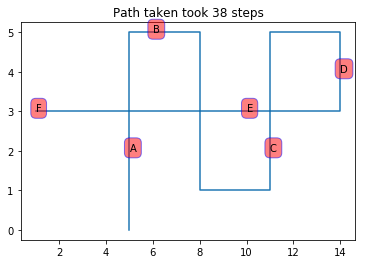

In [106]:
def solve_puzzle(puzzle=test_input):
    letters_seen = []
    x = puzzle[0].index("|")
    y = 0
    direction = "DOWN"

    points_visited = []

    while direction is not None:
        val = puzzle[y][x]

        if val is not " ": points_visited.append((x,y))
        
        if val.isalpha():
            letters_seen.append(val)

        if val == "|" or val == "-" or val.isalpha():
            x, y = step(x,y, direction)
        elif val == "+":
            direction = get_direction(x, y, direction, puzzle)
            x, y = step(x,y, direction)
        else:
            print("End of the Line")
            print("Letters seen: ", "".join(letters_seen))
            print("Steps taken: ", len(points_visited))
            print("Pos:", x, y, direction)
            direction = None

    return "".join(letters_seen), points_visited

letters, points = solve_puzzle()

x, y = zip(*points)
plt.title(f"Path taken took {len(points)} steps")

plt.plot(x,y)
box_style = dict(fc="red", ec="b", lw=1, alpha=0.5, boxstyle="round,pad=0.5")
for x,y in points:
    val = test_input[y][x]
    if val.isalpha():
        plt.annotate(val, xy=(x,y), bbox=box_style)
plt.show()

All right, we get the right answer. Running it on the puzzle input:

End of the Line
Letters seen:  MOABEUCWQS
Steps taken:  18058
Pos: 142 89 RIGHT


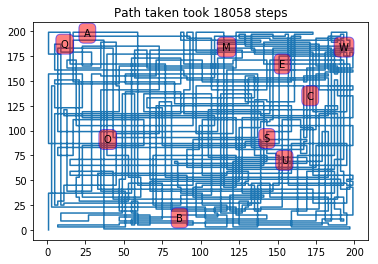

In [107]:
letters, points = solve_puzzle(puzzle_input)

x, y = zip(*points)
plt.title(f"Path taken took {len(points)} steps")

plt.plot(x,y)
for x,y in points:
    val = puzzle_input[y][x]
    if val.isalpha():
        plt.annotate(val, xy=(x,y), bbox=box_style)
plt.show()

It works! Puzzle answer is `MOABEUCWQS`, steps taken is `18058`

## Notes:

- make a animation of it following the path
- check for edge cases - this will fail for some inputs